# Lecture 4 – Data 100, Summer 2024

Data 100, Summer 2024

[Acknowledgments Page](https://ds100.org/su24/acks/)

A demonstration of advanced `pandas` syntax to accompany Lecture 4.

In [56]:
import numpy as np
import pandas as pd
import plotly.express as px

### Loading `babynames` Dataset

In [57]:
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "data/babynamesbystate.zip"
if not os.path.exists(local_filename): # If the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'STATE.CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.tail(10)

,State,Sex,Year,Name,Count
407418,CA,M,2022,Zach,5
407419,CA,M,2022,Zadkiel,5
407420,CA,M,2022,Zae,5
407421,CA,M,2022,Zai,5
407422,CA,M,2022,Zay,5
407423,CA,M,2022,Zayvier,5
407424,CA,M,2022,Zia,5
407425,CA,M,2022,Zora,5
407426,CA,M,2022,Zuriel,5
407427,CA,M,2022,Zylo,5


### <font color='red'>STOP!</font> Some Quick Exercises

Try to answer the questions in the slides **without** running / looking at the code cells.

What do the following lines of code evaluate to? 

In [58]:
def a_count(string):
    return string.count('a')
# Use map to apply a_count to each name in the "Name" column
babynames["a_count"] = babynames["Name"].map(a_count)
babynames = babynames.sort_values(by="a_count", ascending=False)
babynames.head()

,State,Sex,Year,Name,Count,a_count
130623,CA,F,1994,Mayraalejandra,6,5
104591,CA,F,1987,Mayraalejandra,9,5
111404,CA,F,1989,Mayraalejandra,8,5
102523,CA,F,1986,Mayraalejandra,5,5
107978,CA,F,1988,Mayraalejandra,8,5


Now we want to drop the column we just created. How would we do this? 

In [59]:
babynames.drop("a_count")

KeyError: "['a_count'] not found in axis"

In [5]:
babynames = babynames.drop("a_count")

KeyError: "['a_count'] not found in axis"

In [6]:
babynames = babynames.drop('a_count', axis='columns')

In [7]:
babynames = babynames.sort_values("Name", key=lambda x: x.str.count('a'), ascending=False)
babynames.head()

,State,Sex,Year,Name,Count
130623,CA,F,1994,Mayraalejandra,6
111404,CA,F,1989,Mayraalejandra,8
102523,CA,F,1986,Mayraalejandra,5
107978,CA,F,1988,Mayraalejandra,8
104591,CA,F,1987,Mayraalejandra,9


## Grouping

Group rows that share a common feature, then aggregate data across the group.

In this example, we count the total number of babies born in each year (considering only a small subset of the data, for simplicity).

<img src="images/groupby.png" width="800"/>

In [11]:
# The code below uses the full babynames dataset, which is why some numbers are different relative to the diagram
babynames[["Year", "Count"]].groupby("Year").sum()

,Count
Year,
1910,9163
1911,9983
1912,17946
1913,22094
1914,26926
...,...
2018,395436
2019,386996
2020,362882


There are many different aggregation functions we can use, all of which are useful in different applications.

In [12]:
# What is the earliest year in which each name appeared?
babynames.groupby("Name")[["Year"]].min()

,Year
Name,
Aadan,2008
Aadarsh,2019
Aaden,2007
Aadhav,2014
Aadhini,2022
...,...
Zymir,2020
Zyon,1999
Zyra,2012


In [13]:
# What is the largest single-year count of each name?
babynames.groupby("Name")[["Count"]].max()

,Count
Name,
Aadan,7
Aadarsh,6
Aaden,158
Aadhav,8
Aadhini,6
...,...
Zymir,5
Zyon,17
Zyra,16


In this example, we count the total number of babies born each year (considering only a small subset of the data for simplicity).

In [14]:
babynames.groupby("Year")

In [15]:
# Selecting only numerical columns to perform grouping on and then grouping by "Year"
babies_by_year = babynames[["Year", "Count"]].groupby("Year").sum()
babies_by_year

,Count
Year,
1910,9163
1911,9983
1912,17946
1913,22094
1914,26926
...,...
2018,395436
2019,386996
2020,362882


What happens if we don't select columns `Year` and `Count` before calling `groupby` and our aggregation function? The results are messy! 

In [16]:
babynames.groupby("Year").sum()

,State,Sex,Name,Count
Year,,,,
1910,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFFFMMMFFFFFFFFFFFFFFFFFFFFFFFFF...,BarbaraMargaritaPatriciaMariaMatildaCarmelitaR...,9163
1911,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,BarbaraPatriciaMatildaMarthaLauraJuanitaSaraWa...,9983
1912,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFFFFFFFFFFMMMMMFFFFFFFFFFFFFFFF...,BarbaraCatalinaRamonaSarahMarianMargaretMartha...,17946
1913,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFF...,BarbaraMargaritaPatriciaJuanitaSarahMasakoWand...,22094
1914,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFF...,MargaritaBarbaraSarahClaraMariaMatildaMarcella...,26926
...,...,...,...,...
2018,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,DayanaraMariafernandaGiavannaCandelariaMalaysi...,395436
2019,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFF...,DayanaraCatalayaMariafernandaMarianaSavannahNa...,386996
2020,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFMFFFFMMMFFFFFMFFFFFFMFFFMFFFMMMFFFFFFFMF...,KatalayaCatalayaDayanaraMalaikaNalayahSaanvika...,362882


Alternatively, we could select the relevant columns after calling `groupby` from the "sub-`DataFrames`":

In [17]:
babynames.groupby("Year")[["Year", "Count"]].sum()

,Year,Count
Year,,
1910,693330,9163
1911,751023,9983
1912,1066896,17946
1913,1172669,22094
1914,1358940,26926
...,...,...
2018,13219918,395436
2019,13171956,386996
2020,12956280,362882


Or, another way (Note: the result is slightly different as it doesn't aggregate the `Year` column despite it being numeric because we are grouping by it): 

In [18]:
babynames.groupby("Year").sum(numeric_only=True)

,Count
Year,
1910,9163
1911,9983
1912,17946
1913,22094
1914,26926
...,...
2018,395436
2019,386996
2020,362882


In [ ]:
# Plotting baby counts per year
fig = px.line(babies_by_year, y = "Count")
fig.update_layout(font_size = 18, 
                  autosize=False, 
                  width=700, 
                  height=400)

### <font color='red'>STOP!</font> Slido Exercise

Try answering the Slido poll/following question **without** looking at the next image. Try to predict the results of the `groupby` operation shown. 

The answer is below the image.

<img src="images/groupby.png" alt="Image" width="600">

The top ?? will be "hi", the second ?? will be "tx", and the third ?? will be "sd". 

In [19]:
ds = pd.DataFrame(dict(x=[3, 1, 4, 1, 5, 9, 2, 5, 6], 
                      y=['ak', 'tx', 'fl', 'hi', 'mi', 'ak', 'ca', 'sd', 'nc']), 
                      index=list('ABCABCACB') )
ds

,x,y
A,3,ak
B,1,tx
C,4,fl
A,1,hi
B,5,mi
C,9,ak
A,2,ca
C,5,sd
B,6,nc


In [20]:
# Performing groupby on the first column with max aggregation function
ds.groupby(ds.index).max()

,x,y
A,3,hi
B,6,tx
C,9,sd


In [21]:
('hi' > 'ak') & ('hi' > 'ca')

True

### Case Study: Name "Popularity"

In this exercise, let's find the name with sex "F" that has dropped most in popularity since its peak usage in California. We'll start by filtering `babynames` to only include names corresponding to sex "F".

In [22]:
f_babynames = babynames[babynames["Sex"] == "F"]
f_babynames

,State,Sex,Year,Name,Count
130623,CA,F,1994,Mayraalejandra,6
111404,CA,F,1989,Mayraalejandra,8
102523,CA,F,1986,Mayraalejandra,5
107978,CA,F,1988,Mayraalejandra,8
104591,CA,F,1987,Mayraalejandra,9
...,...,...,...,...,...
22964,CA,F,1946,Adrienne,40
22960,CA,F,1946,Angie,41
22948,CA,F,1946,Bernice,45
22958,CA,F,1946,Kim,42


In [23]:
# We sort the data by "Year"
f_babynames = f_babynames.sort_values("Year")
f_babynames

,State,Sex,Year,Name,Count
174,CA,F,1910,Fannie,7
167,CA,F,1910,Sylvia,8
49,CA,F,1910,Mae,31
188,CA,F,1910,Beverly,6
204,CA,F,1910,Adele,5
...,...,...,...,...,...
236846,CA,F,2022,Kayleigh,29
237573,CA,F,2022,Sidra,14
237562,CA,F,2022,Raylene,14
236675,CA,F,2022,Julietta,38


To build our intuition on how to answer our research question, let's visualize the prevalence of the name "Jennifer" over time.

In [24]:
# We'll talk about how to generate plots in a later lecture
fig = px.line(f_babynames[f_babynames["Name"] == "Jennifer"],
              x="Year", y="Count")

fig.update_layout(font_size = 18, 
                  autosize=False, 
                  width=1000, 
                  height=400)

We'll need a mathematical definition for the change in popularity of a name in California.

Define the metric "Ratio to Peak" (RTP). We'll calculate this as the count of the name in 2022 (the most recent year for which we have data) divided by the largest count of this name in *any* year. 

A demo calculation for Jennifer:

In [25]:
# In the year with the highest Jennifer count, 6065 Jennifers were born
max_jenn = np.max(f_babynames[f_babynames["Name"] == "Jennifer"]["Count"])
max_jenn

6065

In [26]:
# Remember that we sorted f_babynames by "Year". 
# This means that grabbing the final entry gives us the most recent count of Jennifers: 114
# In 2022, the most recent year for which we have data, 114 Jennifers were born
curr_jenn = f_babynames[f_babynames["Name"] == "Jennifer"]["Count"].iloc[-1]
curr_jenn

114

In [27]:
# Compute the RTP
curr_jenn / max_jenn

0.018796372629843364

We can also write a function that produces the `ratio_to_peak`for a given `Series`. This will allow us to use `.groupby` to speed up our computation for all names in the dataset.

In [28]:
def ratio_to_peak(series):
    """
    Compute the RTP for a Series containing the counts per year for a single name (year column sorted ascendingly).
    """
    return series.iloc[-1] / np.max(series)

In [29]:
# Construct a Series containing our Jennifer count data
jenn_counts_ser = f_babynames[f_babynames["Name"] == "Jennifer"]["Count"]

# Then, find the RTP
ratio_to_peak(jenn_counts_ser)

0.018796372629843364

Now, let's use `.groupby` to compute the RTPs for *all* names in the dataset.

You may see a warning message when running the cell below. As discussed in the lecture, `pandas` can't apply an aggregation function to non-numeric data (it doens't make sense to divide "CA" by a number). We can select numerical columns of interest directly.

In [30]:
rtp_table = f_babynames.groupby("Name")[["Year", "Count"]].agg(ratio_to_peak)
rtp_table

,Year,Count
Name,,
Aadhini,1.0,1.000000
Aadhira,1.0,0.500000
Aadhya,1.0,0.660000
Aadya,1.0,0.586207
Aahana,1.0,0.269231
...,...,...
Zyanya,1.0,0.466667
Zyla,1.0,1.000000
Zylah,1.0,1.000000


In [ ]:
# Results in a TypeError
# rtp_table = f_babynames.groupby("Name").agg(ratio_to_peak)
# rtp_table

This is the `pandas` equivalent of `.group` from [Data 8](http://data8.org/datascience/_autosummary/datascience.tables.Table.group.html). If we wanted to achieve this same result using the `datascience` library, we would write:

`f_babynames.group("Name", ratio_to_peak)`

### <font color='red'>STOP!</font> Slido Exercise

Try answering the Slido poll/following question **without** running the next cell: Is there a row where `Year` is not equal to 1?

In [31]:
# Unique values in the Year column
rtp_table["Year"].unique()

array([1.])

In [32]:
# Dropping the "Year" column
rtp_table.drop("Year", axis="columns", inplace=True)
rtp_table

,Count
Name,
Aadhini,1.000000
Aadhira,0.500000
Aadhya,0.660000
Aadya,0.586207
Aahana,0.269231
...,...
Zyanya,0.466667
Zyla,1.000000
Zylah,1.000000


In [33]:
# Rename "Count" to "Count RTP" for clarity
rtp_table = rtp_table.rename(columns = {"Count": "Count RTP"})
rtp_table

,Count RTP
Name,
Aadhini,1.000000
Aadhira,0.500000
Aadhya,0.660000
Aadya,0.586207
Aahana,0.269231
...,...
Zyanya,0.466667
Zyla,1.000000
Zylah,1.000000


In [34]:
# What name has fallen the most in popularity?
rtp_table.sort_values("Count RTP")

,Count RTP
Name,
Debra,0.001260
Debbie,0.002815
Carol,0.003180
Tammy,0.003249
Susan,0.003305
...,...
Fidelia,1.000000
Naveyah,1.000000
Finlee,1.000000


We can visualize the decrease in the popularity of the name "Debra:"

In [35]:
def plot_name(*names):
    fig = px.line(f_babynames[f_babynames["Name"].isin(names)], 
                  x = "Year", y = "Count", color="Name",
                  title=f"Popularity for: {names}")
    fig.update_layout(font_size = 18, 
                  autosize=False, 
                  width=1000, 
                  height=400)
    return fig

plot_name("Debra")

In [36]:
# Find the 10 names that have decreased the most in popularity
top10 = rtp_table.sort_values("Count RTP").head(10).index
top10

Index(['Debra', 'Debbie', 'Carol', 'Tammy', 'Susan', 'Cheryl', 'Shannon',
       'Tina', 'Michele', 'Terri'],
      dtype='object', name='Name')

In [37]:
plot_name(*top10)

For fun, try plotting your name or your friends' names.

### `groupby.size` and `groupby.count()`

In [38]:
df = pd.DataFrame({'letter':['A', 'A', 'B', 'C', 'C', 'C'], 
                   'num':[1, 2, 3, 4, np.NaN, 4], 
                   'state':[np.NaN, 'tx', 'fl', 'hi', np.NaN, 'ak']})
df

,letter,num,state
0,A,1.0,NaN
1,A,2.0,tx
2,B,3.0,fl
3,C,4.0,hi
4,C,NaN,NaN
5,C,4.0,ak


`groupby.size()` returns a `Series`, indexed by the `letter`s that we grouped by, with values denoting the number of rows in each group/sub-DataFrame. It does not care about missing (`NaN`) values.

In [40]:
df.groupby("letter").size()

letter
A    2
B    1
C    3
dtype: int64

`groupby.count()` returns a `DataFrame`, indexed by the `letter`s that we grouped by. Each column represents the number of non-missing values for that `letter`.

In [41]:
df.groupby("letter").count()

,num,state
letter,,
A,2,1
B,1,1
C,2,2


You might recall `value_counts()` function we talked about last week. What's the difference?

In [42]:
df["letter"].value_counts()

letter
C    3
A    2
B    1
Name: count, dtype: int64

Turns out `value_counts()` does something similar to `groupby.size()`, except that it also sorts the resulting `Series` in descending order.

## Filtering by Group

In [43]:
# Let's read the elections dataset
elections = pd.read_csv("data/elections.csv")
elections.sample(5)

,Year,Candidate,Party,Popular vote,Result,%
36,1880,James Garfield,Republican,4453337,win,48.369234
145,1996,Bob Dole,Republican,39197469,loss,40.766036
124,1976,Lester Maddox,American Independent,170274,loss,0.209640
152,2000,George W. Bush,Republican,50456002,win,47.974666
147,1996,Howard Phillips,Taxpayers,184656,loss,0.192045


Let's keep only the elections years where the maximum vote share `%` is less than 45%.

In [46]:
elections.groupby("Year").filter(lambda sf: sf["%"].max() < 45).head(10)

,Year,Candidate,Party,Popular vote,Result,%
23,1860,Abraham Lincoln,Republican,1855993,win,39.699408
24,1860,John Bell,Constitutional Union,590901,loss,12.639283
25,1860,John C. Breckinridge,Southern Democratic,848019,loss,18.138998
26,1860,Stephen A. Douglas,Northern Democratic,1380202,loss,29.522311
66,1912,Eugene V. Debs,Socialist,901551,loss,6.004354
67,1912,Eugene W. Chafin,Prohibition,208156,loss,1.386325
68,1912,Theodore Roosevelt,Progressive,4122721,loss,27.457433
69,1912,William Taft,Republican,3486242,loss,23.218466
70,1912,Woodrow Wilson,Democratic,6296284,win,41.933422
115,1968,George Wallace,American Independent,9901118,loss,13.571218


### `groupby` Puzzle

Assume that we want to know the best election by each party.

#### Attempt #1

We have to be careful when using aggregation functions. For example, the code below might be misinterpreted to say that Woodrow Wilson successfully ran for election in 2020. Why is this happening?

In [50]:
elections.groupby("Party").max().head(10)

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1976,Thomas J. Anderson,873053,loss,21.554001
American Independent,1976,Lester Maddox,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182
Communist,1932,William Z. Foster,103307,loss,0.261069
Constitution,2016,Michael Peroutka,203091,loss,0.152398
Constitutional Union,1860,John Bell,590901,loss,12.639283
Democratic,2020,Woodrow Wilson,81268924,win,61.344703


#### Attempt #2

Next, we'll write code that properly returns _the best result by each party_. That is, each row should show the Year, Candidate, Popular Vote, Result, and % for the election in which that party saw its best results (rather than mixing them as in the example above). Here's what the first rows of the correct output should look like:

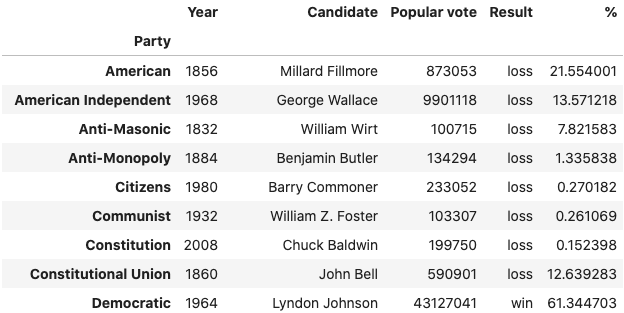

In [52]:
elections_sorted_by_percent = elections.sort_values("%", ascending=False)
elections_sorted_by_percent.head(8)

,Year,Candidate,Party,Popular vote,Result,%
114,1964,Lyndon Johnson,Democratic,43127041,win,61.344703
91,1936,Franklin Roosevelt,Democratic,27752648,win,60.978107
120,1972,Richard Nixon,Republican,47168710,win,60.907806
79,1920,Warren Harding,Republican,16144093,win,60.574501
133,1984,Ronald Reagan,Republican,54455472,win,59.023326
84,1928,Herbert Hoover,Republican,21427123,win,58.368524
86,1932,Franklin Roosevelt,Democratic,22821277,win,57.672125
109,1956,Dwight Eisenhower,Republican,35579180,win,57.650654


In [51]:
elections_sorted_by_percent.groupby("Party").first()

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182
Communist,1932,William Z. Foster,103307,loss,0.261069
Constitution,2008,Chuck Baldwin,199750,loss,0.152398
Constitutional Union,1860,John Bell,590901,loss,12.639283
Democratic,1964,Lyndon Johnson,43127041,win,61.344703


#### Alternative Solutions

You'll soon discover that with `Pandas` rich tool set, there's typically more than one way to get to the same answer. Each approach has different tradeoffs in terms of readability, performance, memory consumption, complexity, and more. It will take some experience for you to develop a sense of which approach is better for each problem, but you should, in general, try to think if you can at least envision a different solution to a given problem, especially if you find your current solution to be particularly convoluted or hard to read.

Here are a couple of other ways of obtaining the same result (in each case, we only show the top part with `head()`). The first approach uses `groupby` but finds the location of the maximum value via the `idxmax()` method (look up its documentation!).  We then index and sort by `Party` to match the requested formatting:

In [55]:
elections.groupby("Party")["%"].idxmax()

Party
American                  22
American Independent     115
Anti-Masonic               6
Anti-Monopoly             38
Citizens                 127
Communist                 89
Constitution             164
Constitutional Union      24
Democratic               114
Democratic-Republican      0
Dixiecrat                103
Farmer–Labor              78
Free Soil                 15
Green                    155
Greenback                 35
Independent              143
Liberal Republican        31
Libertarian              175
National Democratic       50
National Republican        3
National Union            27
Natural Law              148
New Alliance             136
Northern Democratic       26
Populist                  48
Progressive               68
Prohibition               49
Reform                   150
Republican               120
Socialist                 66
Southern Democratic       25
States' Rights           110
Taxpayers                147
Union                     93
Union La

In [65]:
# This is the computational part
best_per_party = elections.loc[elections.groupby("Party")["%"].idxmax()]

# This indexes by Party to match the formatting above
best_per_party.set_index('Party').sort_index().head() 

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182


And this one doesn't even use `groupby`! This approach instead uses the `drop_duplicates` method to keep only the last occurrence of of each party after having sorted by "%", which is the best performance.  Again, the 2nd line is purely formatting:

In [61]:
best_per_party2 = elections.sort_values("%").drop_duplicates(["Party"], keep="last")
best_per_party2.set_index("Party").sort_index().head()  # Formatting

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182


*Challenge:* See if you can find yet another approach that still gives the same answer.

### `DataFrameGroupBy` Objects

The result of `groupby` is not a `DataFrame` or a list of `DataFrame`s. It is instead a special type called a `DataFrameGroupBy`.

In [66]:
grouped_by_party = elections.groupby("Party")
type(grouped_by_party)

pandas.core.groupby.generic.DataFrameGroupBy

`GroupBy` objects are structured like dictionaries. In fact, we can actually see the dictionaries with the following code:

In [67]:
grouped_by_party.groups

{'American': [22, 126], 'American Independent': [115, 119, 124], 'Anti-Masonic': [6], 'Anti-Monopoly': [38], 'Citizens': [127], 'Communist': [89], 'Constitution': [160, 164, 172], 'Constitutional Union': [24], 'Democratic': [2, 4, 8, 10, 13, 14, 17, 20, 28, 29, 34, 37, 39, 45, 47, 52, 55, 57, 64, 70, 74, 77, 81, 83, 86, 91, 94, 97, 100, 105, 108, 111, 114, 116, 118, 123, 129, 134, 137, 140, 144, 151, 158, 162, 168, 176, 178], 'Democratic-Republican': [0, 1], 'Dixiecrat': [103], 'Farmer–Labor': [78], 'Free Soil': [15, 18], 'Green': [149, 155, 156, 165, 170, 177, 181], 'Greenback': [35], 'Independent': [121, 130, 143, 161, 167, 174], 'Liberal Republican': [31], 'Libertarian': [125, 128, 132, 138, 139, 146, 153, 159, 163, 169, 175, 180], 'National Democratic': [50], 'National Republican': [3, 5], 'National Union': [27], 'Natural Law': [148], 'New Alliance': [136], 'Northern Democratic': [26], 'Populist': [48, 61, 141], 'Progressive': [68, 82, 101, 107], 'Prohibition': [41, 44, 49, 51, 54,

The `key`s of the dictionary are the groups (in this case, `Party`), and the `value`s are the **indices** of rows belonging to that group. We can access a particular sub-`DataFrame` using `get_group`:

In [68]:
grouped_by_party.get_group("Socialist")

,Year,Candidate,Party,Popular vote,Result,%
58,1904,Eugene V. Debs,Socialist,402810,loss,2.985897
62,1908,Eugene V. Debs,Socialist,420852,loss,2.850866
66,1912,Eugene V. Debs,Socialist,901551,loss,6.004354
71,1916,Allan L. Benson,Socialist,590524,loss,3.194193
76,1920,Eugene V. Debs,Socialist,913693,loss,3.428282
85,1928,Norman Thomas,Socialist,267478,loss,0.728623
88,1932,Norman Thomas,Socialist,884885,loss,2.236211
92,1936,Norman Thomas,Socialist,187910,loss,0.412876
95,1940,Norman Thomas,Socialist,116599,loss,0.234237
102,1948,Norman Thomas,Socialist,139569,loss,0.286312


---

## Pivot Tables

### `Groupby` with multiple columns

We want to build a table showing the total number of babies born of each sex in each year. One way is to `groupby` using both columns of interest:

In [69]:
babynames.groupby(["Year", "Sex"])[["Count"]].sum().head(6)

Count
Year Sex       
1910 F     5950
     M     3213
1911 F     6602
     M     3381
1912 F     9804
     M     8142

### `pivot_table`

In [71]:
babynames.pivot_table(
    index = "Year", 
    columns = "Sex", 
    values = "Count", 
    aggfunc = "sum").head(6)

Sex,F,M
Year,,
1910,5950,3213
1911,6602,3381
1912,9804,8142
1913,11860,10234
1914,13815,13111
1915,18643,17192


<img src="images/pivote_image.png" alt="Image" width="600">

### `pivot_table` with Multiple values

In [72]:
babynames.pivot_table(
    index = "Year", 
    columns = "Sex", 
    values = ["Count", "Name"], 
    aggfunc = "max").head(6)

Count          Name         
Sex      F     M       F        M
Year                             
1910   295   237  Yvonne  William
1911   390   214   Zelma   Willis
1912   534   501  Yvonne  Woodrow
1913   584   614   Zelma   Yoshio
1914   773   769   Zelma   Yoshio
1915   998  1033    Zita    Yukio

---

## Join Tables

What if we want to know the popularity of presidential candidates' first names in California in 2022? What can we do?

In [73]:
elections.head(10)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
5,1832,Henry Clay,National Republican,484205,loss,37.603628
6,1832,William Wirt,Anti-Masonic,100715,loss,7.821583
7,1836,Hugh Lawson White,Whig,146109,loss,10.005985
8,1836,Martin Van Buren,Democratic,763291,win,52.272472
9,1836,William Henry Harrison,Whig,550816,loss,37.721543


In [74]:
babynames_2022 = babynames[babynames["Year"] == 2022]
babynames_2022.head(10)

,State,Sex,Year,Name,Count,a_count
237517,CA,F,2022,Dayanara,14,4
238542,CA,F,2022,Jaiyana,7,3
238718,CA,F,2022,Anaaya,6,3
238720,CA,F,2022,Anapaula,6,3
238698,CA,F,2022,Ahaana,6,3
238729,CA,F,2022,Annastasia,6,3
238569,CA,F,2022,Kattaleya,7,3
238568,CA,F,2022,Katalyna,7,3
238567,CA,F,2022,Kasandra,7,3
238662,CA,F,2022,Tayanna,7,3


In [75]:
elections["First Name"] = elections["Candidate"].str.split(" ").str[0]
elections

,Year,Candidate,Party,Popular vote,Result,%,First Name
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878,John
2,1828,Andrew Jackson,Democratic,642806,win,56.203927,Andrew
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073,John
4,1832,Andrew Jackson,Democratic,702735,win,54.574789,Andrew
...,...,...,...,...,...,...,...
177,2016,Jill Stein,Green,1457226,loss,1.073699,Jill
178,2020,Joseph Biden,Democratic,81268924,win,51.311515,Joseph
179,2020,Donald Trump,Republican,74216154,loss,46.858542,Donald
180,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979,Jo


Unlike in Data 8, the join function is called `merge` in pandas. `join` in pandas does something slightly different—we won't talk about it in this class.

In [76]:
merged = pd.merge(left = elections, right = babynames_2022, 
                  left_on = "First Name", right_on = "Name")
merged

,Year_x,Candidate,Party,Popular vote,Result,%,First Name,State,Sex,Year_y,Name,Count,a_count
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew,CA,M,2022,Andrew,741,0
1,1828,Andrew Jackson,Democratic,642806,win,56.203927,Andrew,CA,M,2022,Andrew,741,0
2,1832,Andrew Jackson,Democratic,702735,win,54.574789,Andrew,CA,M,2022,Andrew,741,0
3,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878,John,CA,M,2022,John,490,0
4,1828,John Quincy Adams,National Republican,500897,loss,43.796073,John,CA,M,2022,John,490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2020,Donald Trump,Republican,74216154,loss,46.858542,Donald,CA,M,2022,Donald,33,1
148,2016,Evan McMullin,Independent,732273,loss,0.539546,Evan,CA,M,2022,Evan,488,1
149,2016,Evan McMullin,Independent,732273,loss,0.539546,Evan,CA,F,2022,Evan,11,1
150,2016,Hillary Clinton,Democratic,65853514,loss,48.521539,Hillary,CA,F,2022,Hillary,10,1


In [77]:
merged.sort_values("Count", ascending=False)

,Year_x,Candidate,Party,Popular vote,Result,%,First Name,State,Sex,Year_y,Name,Count,a_count
75,1892,Benjamin Harrison,Republican,5176108,loss,42.984101,Benjamin,CA,M,2022,Benjamin,1524,1
73,1884,Benjamin Butler,Anti-Monopoly,134294,loss,1.335838,Benjamin,CA,M,2022,Benjamin,1524,1
74,1888,Benjamin Harrison,Republican,5443633,win,47.858041,Benjamin,CA,M,2022,Benjamin,1524,1
45,1880,James Garfield,Republican,4453337,win,48.369234,James,CA,M,2022,James,1086,1
43,1880,James B. Weaver,Greenback,308649,loss,3.352344,James,CA,M,2022,James,1086,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1964,Lyndon Johnson,Democratic,43127041,win,61.344703,Lyndon,CA,M,2022,Lyndon,6,0
92,1912,Woodrow Wilson,Democratic,6296284,win,41.933422,Woodrow,CA,M,2022,Woodrow,6,0
93,1916,Woodrow Wilson,Democratic,9126868,win,49.367987,Woodrow,CA,M,2022,Woodrow,6,0
76,1888,Clinton B. Fisk,Prohibition,249819,loss,2.196299,Clinton,CA,M,2022,Clinton,6,0
